<h1> Мини-проект </h1>

1 - 2) Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (<b>product_id, quantity</b>), имя пользователя (<b>name</b>), и дату этих покупок (<b>date</b>), соответствует названию папки, где лежит папка с пользователем).  
<b><u>В качестве ответа</u></b> укажите сумму по колонке <b>quantity</b>.

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = "/home/jupyter-r-ivanov-20/shared/homeworks/python_ds_miniprojects/4/data/"
dates = os.listdir(path)

In [3]:
df = pd.read_csv(path + dates[0] + "/" + (os.listdir(path + dates[0]))[0] + "/data.csv")
df["name"] = (os.listdir(path + dates[0]))[0]
df["date"] = dates[0]
df["date"] = pd.to_datetime(df.date)

for d in dates:
    users = os.listdir(path + d)
    for u in users:
        if not(d == dates[0] and u == users[0]):
            tmp2 = pd.read_csv(path + d + "/" + u + "/data.csv")
            tmp2["name"] = u
            tmp2["date"] = d
            tmp2["date"] = pd.to_datetime(tmp2.date)
            df = pd.concat([df, tmp2]).reset_index(drop = True).drop(columns = "Unnamed: 0")

In [4]:
df.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [5]:
df.quantity.sum()

480

3) Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [6]:
df.groupby("name", as_index = False) \
  .agg({"quantity" : "sum"}) \
  .sort_values("quantity", ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


4) Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. В качестве ответа укажите, сколько было продано единиц товара с <b>product_id</b> равным <b>56</b>

In [7]:
top = df.groupby("product_id", as_index = False) \
        .agg({"quantity" : "sum"}) \
        .sort_values("quantity", ascending = False) \
        .head(10)

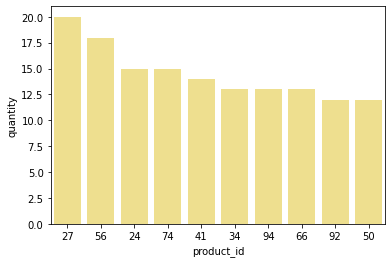

In [8]:
ax = sns.barplot(x = "product_id", y = "quantity", data = top, color = "gold",
                 alpha = 0.5, order = top.product_id)

5) Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (<b>date</b>).

In [9]:
date_df = df.groupby("date", as_index = False) \
            .agg({"quantity" : "sum"})

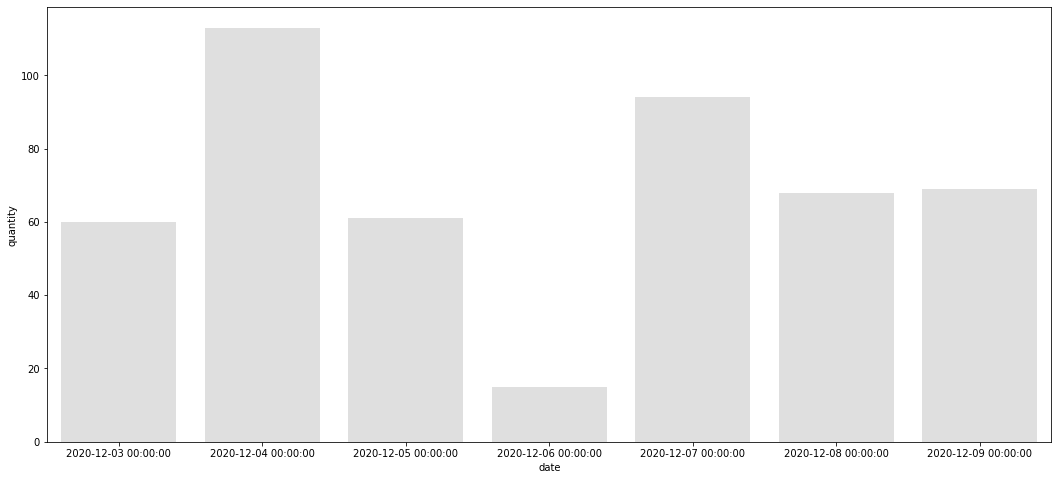

In [10]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x = "date", y = "quantity", data = date_df, color = "silver",
                 alpha = 0.5, order = date_df.date)

6) Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым <b>product_id</b>, совершенную в <b>разные</b> дни. 

In [22]:
df = df.drop_duplicates(subset = ["product_id", "name", "date"])

In [25]:
df = df.groupby(["name", "product_id"], as_index = False).agg({"date" : "count"})

In [27]:
df.query("date > 1").shape[0]

2